In [26]:
LAB 3


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:

df = pd.read_csv("DatasetForCoffeeSales2.csv")
df.head(8)

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472
5,1/6/2023,1,Khobar,coffee beans,Colombian,40,32,1280,True,256,1024
6,1/7/2023,95,Buraidah,coffee beans,Brazilian,30,1,30,True,6,24
7,1/8/2023,27,Medina,coffee beans,Colombian,40,33,1320,False,0,1320


In [12]:
df.dtypes

Date               object
Customer_ID         int64
City               object
Category           object
Product            object
Unit Price          int64
Quantity            int64
Sales Amount        int64
Used_Discount        bool
Discount_Amount     int64
Final Sales         int64
dtype: object

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                 datetime64[ns]
Customer_ID                   int64
City                         object
Category                     object
Product                      object
Unit Price                    int64
Quantity                      int64
Sales Amount                  int64
Used_Discount                  bool
Discount_Amount               int64
Final Sales                   int64
Final Sales (SAR)            object
dtype: object

In [10]:
print(df.isna().sum())

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64


In [17]:
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [16]:
print("Shape (rows, columns): ", df.shape)
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (730, 11)
number of rows:  730
number of columns:  11


In [14]:
df.describe(include='all')

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
count,730,730.000000,730,730,730,730.000000,730.000000,730.000000,730,730.000000,730.000000
unique,NaN,NaN,10,1,5,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Hail,coffee beans,Costa Rica,NaN,NaN,NaN,True,NaN,NaN
freq,NaN,NaN,87,730,165,NaN,NaN,NaN,371,NaN,NaN
mean,2023-12-31 12:00:00,51.669863,NaN,NaN,NaN,36.794521,26.080822,959.924658,NaN,97.393151,862.531507
min,2023-01-01 00:00:00,1.000000,NaN,NaN,NaN,30.000000,1.000000,30.000000,NaN,0.000000,24.000000
25%,2023-07-02 06:00:00,27.250000,NaN,NaN,NaN,35.000000,14.000000,495.000000,NaN,0.000000,448.000000
50%,2023-12-31 12:00:00,52.000000,NaN,NaN,NaN,35.000000,27.000000,960.000000,NaN,13.000000,840.000000
75%,2024-06-30 18:00:00,77.000000,NaN,NaN,NaN,40.000000,39.000000,1400.000000,NaN,192.000000,1260.000000
max,2024-12-30 00:00:00,100.000000,NaN,NaN,NaN,45.000000,49.000000,2205.000000,NaN,441.000000,2205.000000


In [34]:
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Quantity"].sum()
df_monthly

Date
2023-01    721
2023-02    711
2023-03    969
2023-04    756
2023-05    794
2023-06    858
2023-07    818
2023-08    873
2023-09    743
2023-10    746
2023-11    784
2023-12    725
2024-01    751
2024-02    826
2024-03    757
2024-04    739
2024-05    786
2024-06    881
2024-07    855
2024-08    837
2024-09    859
2024-10    653
2024-11    800
2024-12    797
Freq: M, Name: Quantity, dtype: int64

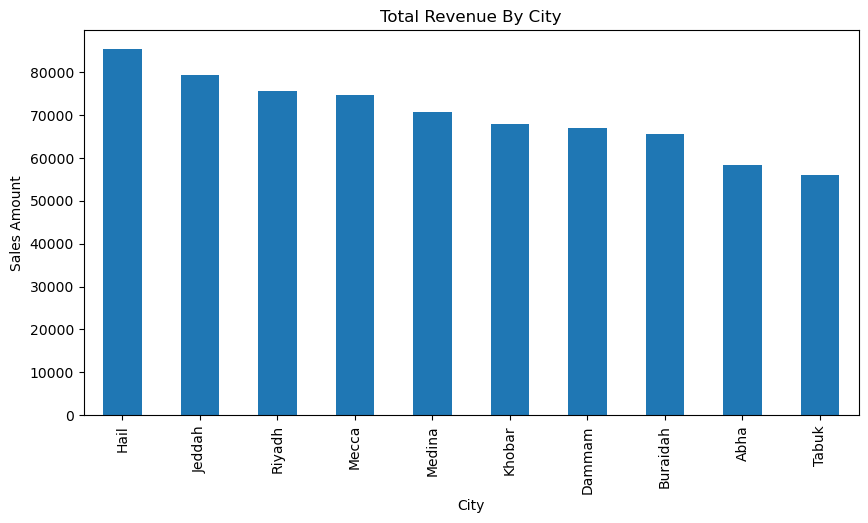

City
Hail        85495
Jeddah      79320
Riyadh      75595
Mecca       74735
Medina      70710
Khobar      67890
Dammam      67060
Buraidah    65500
Abha        58455
Tabuk       55985
Name: Sales Amount, dtype: int64

In [21]:
city_revenue = df.groupby('City')['Sales Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
city_revenue.plot(kind='bar')
plt.title("Total Revenue By City")
plt.ylabel("Sales Amount")
plt.show()

city_revenue

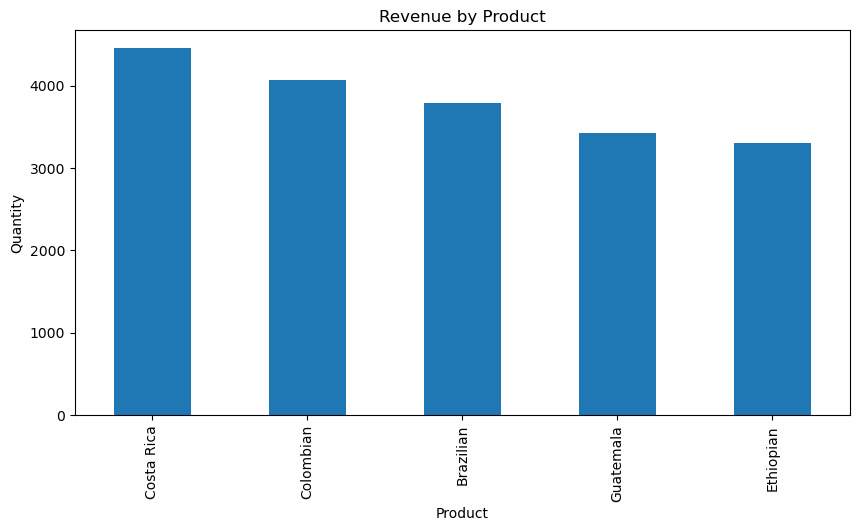

Product
Costa Rica    4452
Colombian     4072
Brazilian     3792
Guatemala     3425
Ethiopian     3298
Name: Quantity, dtype: int64

In [40]:
product_revenue = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Quantity")
plt.show()

product_revenue

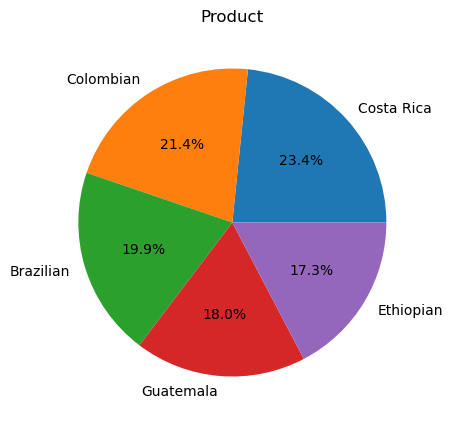

Product
Costa Rica    4452
Colombian     4072
Brazilian     3792
Guatemala     3425
Ethiopian     3298
Name: Quantity, dtype: int64

In [56]:
product_revenue = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='pie' ,
                    autopct='%1.1f%%')
plt.title("Product")
plt.ylabel("")
plt.show()

product_revenue

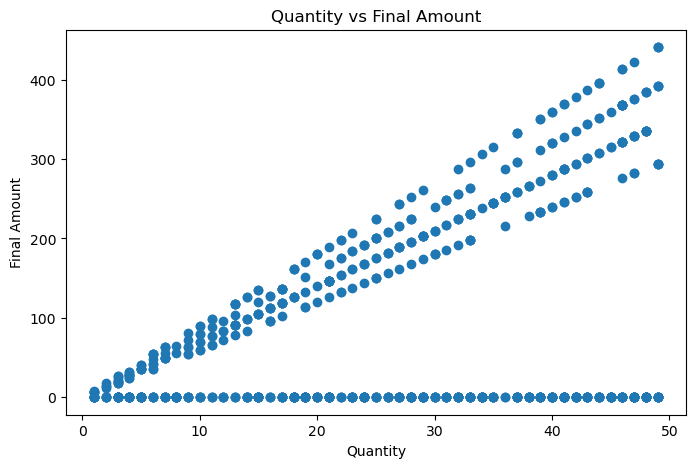

In [72]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Discount_Amount'])
plt.title("Quantity vs Final Amount")
plt.xlabel("Quantity")
plt.ylabel("Final Amount")
plt.show()

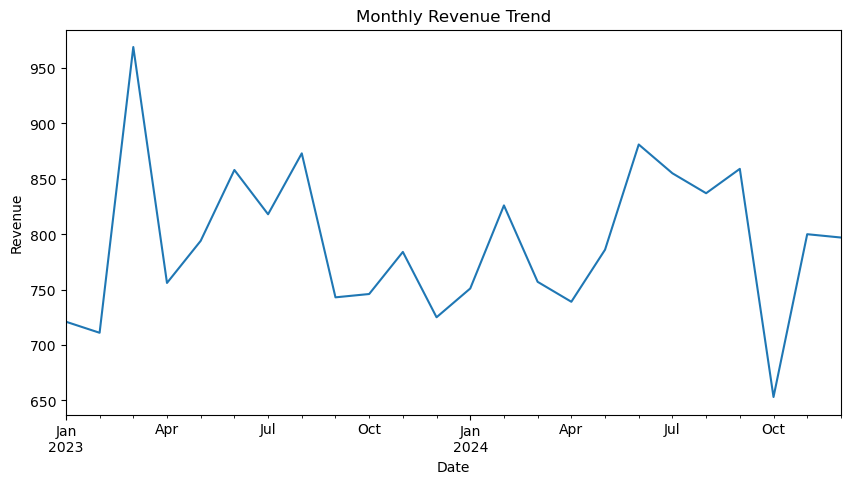

In [16]:

df['Date'] = pd.to_datetime(df['Date'])
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Quantity'].sum()
plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()